# Programming Assignment: Data Science Basics

In this programming assignment you need to apply your new `numpy`, `pandas` and `matplotlib` knowledge. You will need to do several [`groupby`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)s and [`join`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html)`s to solve the task. 

In [2]:
# Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

Pandas allows you to load the required data sets directly from github:

In [3]:
# Load Data
transactions    = pd.read_csv('https://github.com/GuntherGust/tds2_data/raw/main/data/sales_train.csv.gz')
items           = pd.read_csv('https://raw.githubusercontent.com/GuntherGust/tds2_data/main/data/items.csv')
item_categories = pd.read_csv('https://raw.githubusercontent.com/GuntherGust/tds2_data/main/data/item_categories.csv')

## Get to know the data
Print the **shape** of the loaded dataframes and use [`df.head`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) function to print several rows. Examine the features you are given.

In [4]:
for df in [transactions, items, item_categories]:
    print('--------------------------------------------------------')
    print(df.shape)
    print(df.head(5))
    print('\n\n\n')

--------------------------------------------------------
(2935849, 6)
         date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154      999.00           1.0
1  03.01.2013               0       25     2552      899.00           1.0
2  05.01.2013               0       25     2552      899.00          -1.0
3  06.01.2013               0       25     2554     1709.05           1.0
4  15.01.2013               0       25     2555     1099.00           1.0




--------------------------------------------------------
(22170, 3)
                                           item_name  item_id  \
0          ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D        0   
1  !ABBYY FineReader 12 Professional Edition Full...        1   
2      ***В ЛУЧАХ СЛАВЫ   (UNV)                    D        2   
3    ***ГОЛУБАЯ ВОЛНА  (Univ)                      D        3   
4        ***КОРОБКА (СТЕКЛО)                       D        4   

   item_category_id  
0

## Maximum total revenue among all the shops

Now use your `pandas` skills to get answers for the following questions. 
The first question is:

What was the maximum total revenue among all the shops in July, 2013? 

* Hereinafter *revenue* refers to total sales minus value of goods returned.

*Hints:*

* Sometimes items are returned, find such examples in the dataset. 
* It is handy to split `date` field into [`day`, `month`, `year`] components and use `df.year == 2013` and `df.month == 7` in order to select target subset of dates.
* You may work with `date` feature as with strings, or you may first convert it to `pd.datetime` type with `pd.to_datetime` function, but do not forget to set correct `format` argument.

In [6]:
df = transactions
df['pd_date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')
df['day'] = df['pd_date'].dt.day
df['month'] = df['pd_date'].dt.month
df['year'] = df['pd_date'].dt.year
df['revenue'] = df['item_cnt_day'] * df['item_price']

In [7]:
df_filtered = df[(df.year == 2013) & (df.month == 7)]
revenues = df_filtered.groupby('shop_id').revenue.sum()
print(revenues.head())

shop_id
2     863872.0
3     542030.0
4     975920.0
5     665764.0
6    2111443.0
Name: revenue, dtype: float64


In [8]:
max_revenue = revenues.max()

In [9]:
max_revenue

4886087.749999942

In addition we can find the index (shop id) of the row with the max value in the column using ```idxmax()```

In [10]:
revenues.idxmax()

31

## Constant price

How many items are there, such that their price stays constant (to the best of our knowledge) during the whole period of time?

* Let's assume, that the items are returned for the same price as they had been sold.

In [11]:
num_items_constant_price = np.sum(transactions.groupby('item_id').item_price.nunique() == 1)
num_items_constant_price

5926

## Variance of sold items per day

What was the variance of the number of sold items per day sequence for the shop with `shop_id = 25` in December, 2014?

* Do not count the items that were sold but returned back later.
* Fill `total_num_items_sold`: A dataframe that contains the total number of items sold on each day, sorted by date 
* Then compute variance of the of `total_num_items_sold`
* If there were no sales at a given day, ***do not*** impute missing value with zero, just ignore that day

In [31]:
shop_id = 25

df_filtered = df[(df.shop_id == shop_id) & (df.year == 2014) & (df.month == 12) & (df.item_cnt_day >0)].sort_values(by='pd_date')

In [32]:
total_num_items_sold = df_filtered.groupby('pd_date').item_cnt_day.sum()
total_num_items_sold

pd_date
2014-12-01     153.0
2014-12-02     169.0
2014-12-03     195.0
2014-12-04     164.0
2014-12-05     300.0
2014-12-06     353.0
2014-12-07     326.0
2014-12-08     209.0
2014-12-09     204.0
2014-12-10     143.0
2014-12-11     214.0
2014-12-12     297.0
2014-12-13     432.0
2014-12-14     306.0
2014-12-15     225.0
2014-12-16     192.0
2014-12-17     285.0
2014-12-18     326.0
2014-12-19     418.0
2014-12-20     579.0
2014-12-21     381.0
2014-12-22     318.0
2014-12-23     371.0
2014-12-24     434.0
2014-12-25     506.0
2014-12-26     620.0
2014-12-27     746.0
2014-12-28     662.0
2014-12-30    1966.0
2014-12-31     776.0
Name: item_cnt_day, dtype: float64

In [33]:
total_num_items_sold_var = total_num_items_sold.var()

In [34]:
total_num_items_sold_var

117211.10344827586

## Visualization of the total number of sales per day

Use `total_num_items_sold` to plot the daily sales volume of `shop_id = 25` in December, 2014.

* y-label: 'Num items'
* x-label: 'Day'
* plot-title: 'Daily sold items for shop_id = 25'
* use plt.show() to display the plot in the end

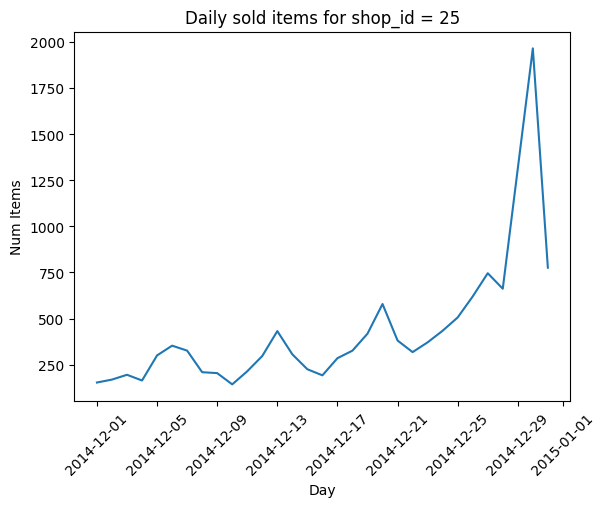

In [35]:
plt.plot(total_num_items_sold)
plt.xlabel('Day')
plt.xticks(rotation=45)
plt.ylabel('Num Items')
plt.title("Daily sold items for shop_id = {}".format(shop_id))
plt.show()

## Final submission
Only for the submission (do not change the code).

In [17]:
print("maximum Revenue: ",max_revenue)
print("Number of items with constant price: ",num_items_constant_price)
print("Sold Items per day: ",total_num_items_sold)
print("Variance: ",total_num_items_sold_var)

maximum Revenue:  4886087.749999942
Number of items with constant price:  5926
Sold Items per day:  pd_date
2014-12-01     153.0
2014-12-02     169.0
2014-12-03     195.0
2014-12-04     164.0
2014-12-05     300.0
2014-12-06     353.0
2014-12-07     326.0
2014-12-08     209.0
2014-12-09     204.0
2014-12-10     143.0
2014-12-11     214.0
2014-12-12     297.0
2014-12-13     432.0
2014-12-14     306.0
2014-12-15     225.0
2014-12-16     192.0
2014-12-17     285.0
2014-12-18     326.0
2014-12-19     418.0
2014-12-20     579.0
2014-12-21     381.0
2014-12-22     318.0
2014-12-23     371.0
2014-12-24     434.0
2014-12-25     506.0
2014-12-26     620.0
2014-12-27     746.0
2014-12-28     662.0
2014-12-30    1966.0
2014-12-31     776.0
Name: item_cnt_day, dtype: float64
Variance:  117211.10344827586


## Bonus

What item category that generated the highest revenue in spring 2014?</b></li>

* Submit the `id` of the category found.
    
* Here, spring is the period from March to Mai.

In [18]:
df_bonus = pd.merge(df[(df.year == 2014) & (df.month < 6) & (df.month > 2)], items)

In [19]:
category_id_with_max_revenue = df_bonus.groupby('item_category_id').revenue.sum().idxmax()

In [20]:
print(category_id_with_max_revenue)

20


In [21]:
df_bonus.groupby('item_category_id').revenue.sum().loc[20]

33755407.40999937